In [219]:
##importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [220]:
##loading the datasets
df = pd.read_excel('Historical_Data.xlsx')
sales = pd.read_excel('Sales_Data.xlsx')

In [221]:
df.index = df.index+1 ##start index at 1
sales.index = sales.index+1 ##start index at 1

In [222]:
df.head()

,Quarter,Product_Line,Revenue,Profit
1,Q4 2013,Cars.go.com,6085063,608506.3
2,Q1 2014,Cars.go.com,5663582,566358.2
3,Q2 2014,Cars.go.com,5701994,570199.4
4,Q3 2014,Cars.go.com,5691910,569191.0
5,Q4 2014,Cars.go.com,5906352,590635.2


In [223]:
sales.head()

,Date,Revenue,Product Line
1,2015-01-01,108632.400,Cars.go.com
2,2015-01-01,31494.015,Planes.go.com
3,2015-01-01,239376.480,Boats.go.com
4,2015-01-02,552064.800,Cars.go.com
5,2015-01-02,238344.120,Planes.go.com


### Calculating Q1-2015 Total Revenue for Different Product Lines

In [224]:
##calculate total revenue for cars.go.com at Q1-2015
q1_2015_cars = sales.loc[sales["Product Line"] == "Cars.go.com", "Revenue"].sum()
print("the total revenue for cars.go.com is", q1_2015_cars, "$")


##calculate total revenue for boats.go.com at Q1-2015
q1_2015_boats = sales.loc[sales["Product Line"] == "Boats.go.com", "Revenue"].sum()
print("the total revenue for boats.go.com is", q1_2015_boats, "$")


##calculate total revenue for planes.go.com at Q1-2015
q1_2015_planes = sales.loc[sales["Product Line"] == "Planes.go.com", "Revenue"].sum()
print("the total revenue for planes.go.com is", q1_2015_planes, "$")

the total revenue for cars.go.com is 16757524.8 $
the total revenue for boats.go.com is 4736347.68 $
the total revenue for planes.go.com is 32529742.56 $


### Regression Plot for Different Product Lines

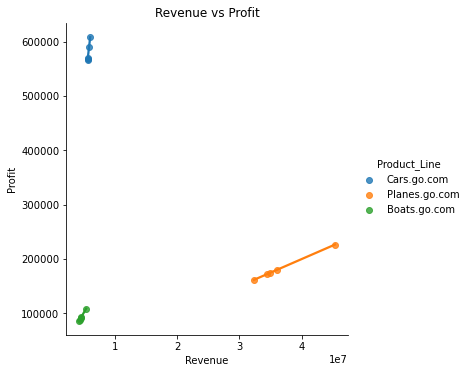

In [225]:
##we have a positive regression between Revenue and Profit
sns.pairplot(data=df, x_vars="Revenue" , y_vars="Profit", kind="reg", hue="Product_Line", size=5, aspect=1).set(title="Revenue vs Profit")

### Creating a Simple Linear Regression Model

In [226]:
##filtering the dataset by product line
df_cars = df[df["Product_Line"] == "Cars.go.com"]
df_planes = df[df["Product_Line"] == "Planes.go.com"]
df_boats = df[df["Product_Line"] == "Boats.go.com"]

In [227]:
##creating a linear regression model for each product line
from sklearn.linear_model import LinearRegression
lr_cars = LinearRegression()
lr_cars.fit(df_cars[['Revenue']], df_cars['Profit'])

lr_planes = LinearRegression()
lr_planes.fit(df_planes[['Revenue']], df_planes['Profit'])

lr_boats = LinearRegression()
lr_boats.fit(df_boats[['Revenue']], df_boats['Profit'])

LinearRegression()

### Predicting Q1-2015 Profit Amount For Each Product Line

In [228]:
##prediction of q1-2015 profit for cars.go.com
car_profit = lr_cars.predict([[q1_2015_cars]]).tolist()[0]
print("the predicted Q1-2015 profit for cars.go.com is", round(car_profit), "$")

the predicted Q1-2015 profit for cars.go.com is 1675752 $


In [229]:
##prediction of q1-2015 profit for planes.go.com
plane_profit = lr_planes.predict([[q1_2015_planes]]).tolist()[0]
print("the predicted Q1-2015 profit for planes.go.com is", round(plane_profit), "$")

the predicted Q1-2015 profit for planes.go.com is 162649 $


In [230]:
##prediction of q1-2015 profit for boats.go.com
boat_profit = lr_boats.predict([[q1_2015_boats]]).tolist()[0]
print("the predicted Q1-2015 profit for boats.go.com is", round(boat_profit), "$")

the predicted Q1-2015 profit for boats.go.com is 94727 $


### Finding the Total Profit for Q1-2015

In [231]:
##creating a new df2 with the revenue and profit amounts for Q1-2015, and
## adding them to our dataset
df2 = pd.DataFrame([["Q1 2015", "Cars.go.com", q1_2015_cars, car_profit],
                   ["Q1 2015", "Planes.go.com", q1_2015_planes, plane_profit],
                   ["Q1 2015", "Boats.go.com", q1_2015_boats, boat_profit]],
                   columns=['Quarter','Product_Line','Revenue', 'Profit'])

frames = [df, df2]
df = pd.concat(frames, ignore_index=True)
df.index = df.index+1
print(df)

    Quarter   Product_Line      Revenue        Profit
1   Q4 2013    Cars.go.com   6085063.00  6.085063e+05
2   Q1 2014    Cars.go.com   5663582.00  5.663582e+05
3   Q2 2014    Cars.go.com   5701994.00  5.701994e+05
4   Q3 2014    Cars.go.com   5691910.00  5.691910e+05
5   Q4 2014    Cars.go.com   5906352.00  5.906352e+05
6   Q4 2013  Planes.go.com  32339403.00  1.616970e+05
7   Q1 2014  Planes.go.com  34861524.00  1.743076e+05
8   Q2 2014  Planes.go.com  36039564.00  1.801978e+05
9   Q3 2014  Planes.go.com  34422242.00  1.721112e+05
10  Q4 2014  Planes.go.com  45337642.00  2.266882e+05
11  Q4 2013   Boats.go.com   4329578.00  8.659156e+04
12  Q1 2014   Boats.go.com   4418088.00  8.836176e+04
13  Q2 2014   Boats.go.com   4657184.00  9.314368e+04
14  Q3 2014   Boats.go.com   4597765.00  9.195530e+04
15  Q4 2014   Boats.go.com   5437214.00  1.087443e+05
16  Q1 2015    Cars.go.com  16757524.80  1.675752e+06
17  Q1 2015  Planes.go.com  32529742.56  1.626487e+05
18  Q1 2015   Boats.go.com  

In [232]:
print("the total predicted Q1-2015 profit is", round(df.loc[df["Quarter"] == "Q1 2015", "Profit"].sum()), "$")

the total predicted Q1-2015 profit is 1933128 $
